In [4]:
# Importing Libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


# Filter for Data Scientist Data
df_DS=df[df['job_title_short'] == 'Data Scientist'].copy()


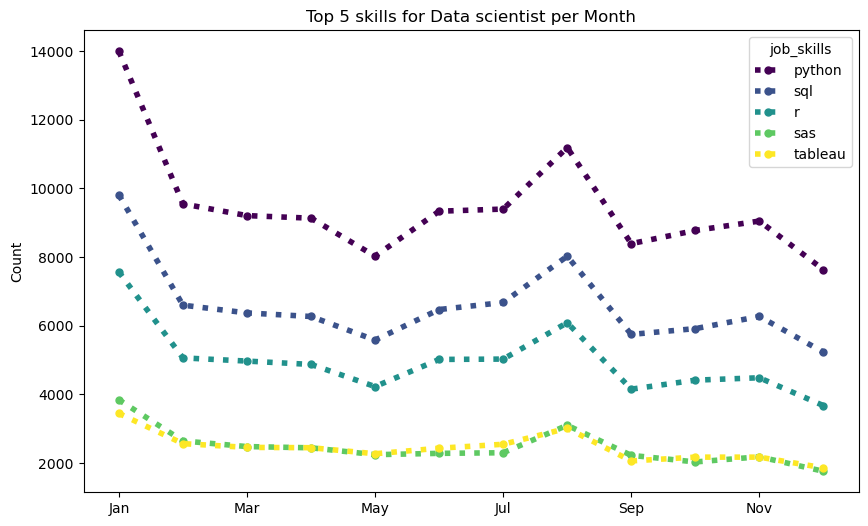

In [17]:
# Create a New Column for Month Number
df_DS['job_posted_month_number'] = df_DS['job_posted_date'].dt.month

# Explode the Job Skill Column and Pivot
df_DS_explode = df_DS.explode('job_skills')
df_DS_pivot = df_DS_explode.pivot_table(index='job_posted_month_number', columns='job_skills', aggfunc='size', fill_value=0)

# Sort the Skills by Count
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot = df_DS_pivot.drop('Total')

# Use Month Name for Plotting
df_DS_pivot = df_DS_pivot.reset_index()
df_DS_pivot['job_posted_month'] = df_DS_pivot['job_posted_month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DS_pivot = df_DS_pivot.set_index('job_posted_month')
df_DS_pivot = df_DS_pivot.drop(columns='job_posted_month_number')

# Get the top 5 Skills
df_DS_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # Options: '-', '--', '-.'
    colormap='viridis', # Options: 'plasma', 'inferno', 'magma', 'cividis'
    marker='o', # Options: '*', 'x', '+', 's', ',', '.', '1', '2', '3'
    markersize=5,
    figsize=(10, 6)

    )

plt.title('Top 5 skills for Data scientist per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Customising our Scatter plot from (15_Matplotlib_Scatter_Plots.ipynb)

In [19]:
# Explode the 'Job Skills' into the individual rows
df_exploded = df_DS.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skills_stat = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Limit to the Top Skills
skills_stat = skills_stat.sort_values(by='skill_count', ascending=False ).head(20)
skills_stat

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


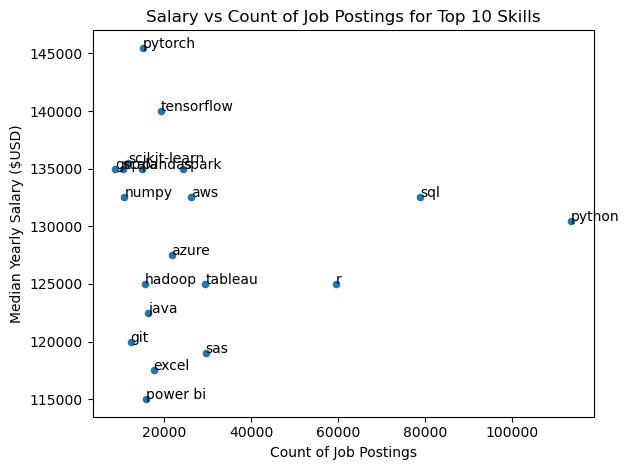

In [20]:
skills_stat.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skills_stat.index):
    plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()

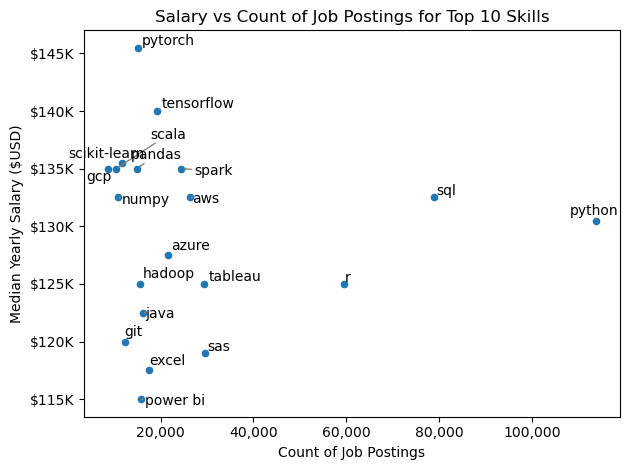

In [28]:
from adjustText import adjust_text
import matplotlib.ticker as ticker

skills_stat.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skills_stat.index):
    texts.append(plt.text(skills_stat['skill_count'].iloc[i], skills_stat['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Formatting the x-axis to include commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.show()